**Credit Score - Label Collection**

Key Points:
* Goals: 
    * Create 2 dataset (Baseline & Treatment 1)
* Recommendation:
    * Compare dataset Baseline with dataset Treatment 1.

# Library

In [41]:
#Basic Statistic & Visualzation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Visualization Function
from function.dev_vis import *

#Transform
from scipy.stats import yeojohnson

import os

# Dataset

In [2]:
dataset_path = r'C:\Users\juan\Documents\Portfolio Project\credit_score\dataset\credit_risk_dataset.csv'
#use index as id to identify data
dataset_raw = pd.read_csv(dataset_path)
dataset_raw.sample(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
28928,29,28000,RENT,2.0,PERSONAL,D,5000,16.07,1,0.18,N,8
25915,29,92000,MORTGAGE,8.0,PERSONAL,B,10000,11.26,0,0.11,N,9
25725,31,90000,MORTGAGE,5.0,VENTURE,A,17000,NaN,0,0.19,N,10
14534,23,109200,MORTGAGE,4.0,VENTURE,A,10000,8.63,0,0.09,N,2
8567,22,59000,MORTGAGE,5.0,MEDICAL,A,6000,NaN,0,0.10,N,2


# Baseline

## Feature Engineering

### Drop Missing Value

In [3]:
df = dataset_raw.dropna()
df = df.reset_index(drop=True)
df.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28487 entries, 1 to 28636
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28487 non-null  int64  
 1   person_income               28487 non-null  int64  
 2   person_home_ownership       28487 non-null  object 
 3   person_emp_length           28487 non-null  float64
 4   loan_intent                 28487 non-null  object 
 5   loan_grade                  28487 non-null  object 
 6   loan_amnt                   28487 non-null  int64  
 7   loan_int_rate               28487 non-null  float64
 8   loan_status                 28487 non-null  int64  
 9   loan_percent_income         28487 non-null  float64
 10  cb_person_default_on_file   28487 non-null  object 
 11  cb_person_cred_hist_length  28487 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 4.1+ MB


### Remove person_age > 60

In [5]:
df = df[df['person_age']<= 60]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28580 entries, 0 to 28636
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28580 non-null  int64  
 1   person_income               28580 non-null  int64  
 2   person_home_ownership       28580 non-null  object 
 3   person_emp_length           28580 non-null  float64
 4   loan_intent                 28580 non-null  object 
 5   loan_grade                  28580 non-null  object 
 6   loan_amnt                   28580 non-null  int64  
 7   loan_int_rate               28580 non-null  float64
 8   loan_status                 28580 non-null  int64  
 9   loan_percent_income         28580 non-null  float64
 10  cb_person_default_on_file   28580 non-null  object 
 11  cb_person_cred_hist_length  28580 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.8+ MB


### Remove emp_length > 20

In [6]:
df = df[df['person_emp_length']<= 20]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28487 entries, 1 to 28636
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28487 non-null  int64  
 1   person_income               28487 non-null  int64  
 2   person_home_ownership       28487 non-null  object 
 3   person_emp_length           28487 non-null  float64
 4   loan_intent                 28487 non-null  object 
 5   loan_grade                  28487 non-null  object 
 6   loan_amnt                   28487 non-null  int64  
 7   loan_int_rate               28487 non-null  float64
 8   loan_status                 28487 non-null  int64  
 9   loan_percent_income         28487 non-null  float64
 10  cb_person_default_on_file   28487 non-null  object 
 11  cb_person_cred_hist_length  28487 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.8+ MB


## Exploratory Dataset Analysis (EDA)

### Variable

In [7]:
num = list(df.describe().columns)
cat = list(df.describe(include=object).columns)

### Descriptive Statistic

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28487 entries, 1 to 28636
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28487 non-null  int64  
 1   person_income               28487 non-null  int64  
 2   person_home_ownership       28487 non-null  object 
 3   person_emp_length           28487 non-null  float64
 4   loan_intent                 28487 non-null  object 
 5   loan_grade                  28487 non-null  object 
 6   loan_amnt                   28487 non-null  int64  
 7   loan_int_rate               28487 non-null  float64
 8   loan_status                 28487 non-null  int64  
 9   loan_percent_income         28487 non-null  float64
 10  cb_person_default_on_file   28487 non-null  object 
 11  cb_person_cred_hist_length  28487 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.8+ MB


In [9]:
#Numeric
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28487.000000,2.848700e+04,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000
mean,27.594025,6.630493e+04,4.716362,9648.572156,11.038959,0.216485,0.169530,5.730438
std,5.889442,5.052035e+04,3.878609,6321.656385,3.228891,0.411856,0.106364,3.928336
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.931300e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.569200e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,60.000000,2.039784e+06,20.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [10]:
#Categorical
df.describe(include=object)

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,28487,28487,28487,28487
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,14490,5697,9355,23411


### Distribution

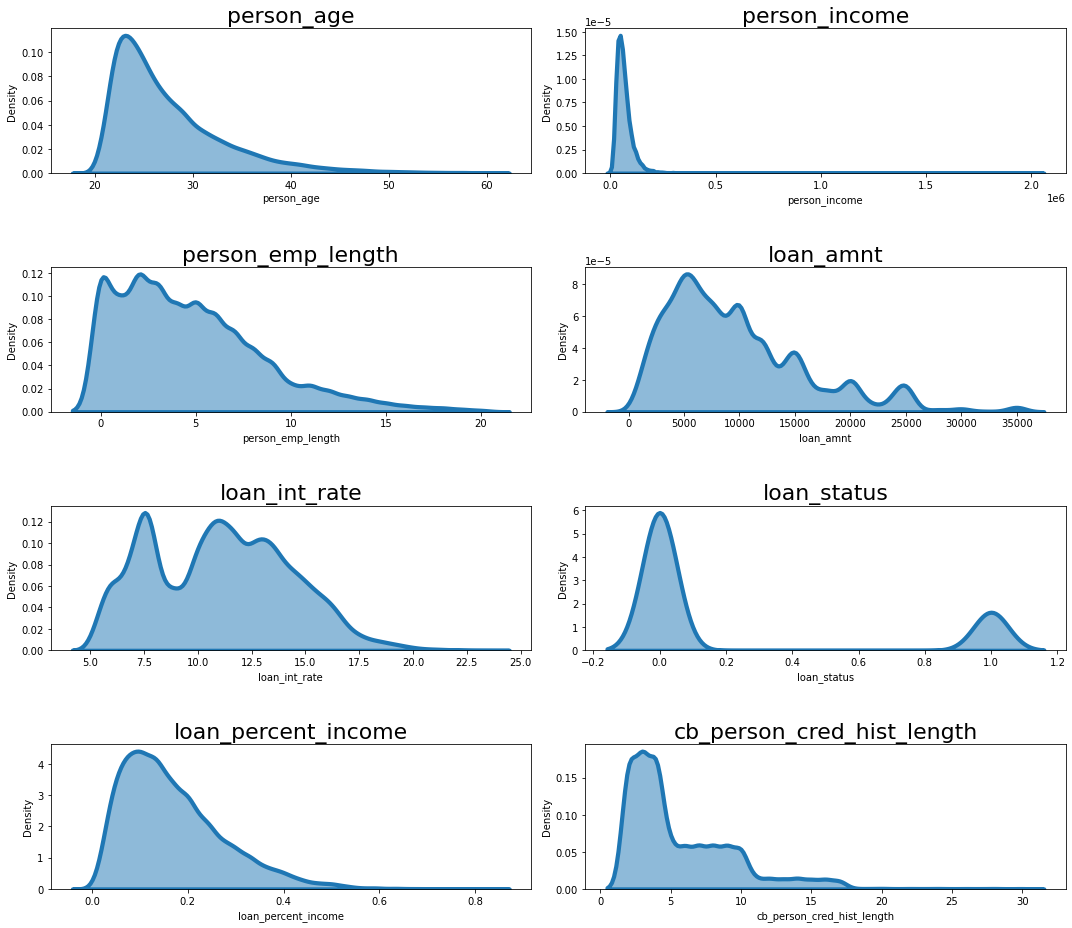

In [11]:
#Numerical
hist(df,num)

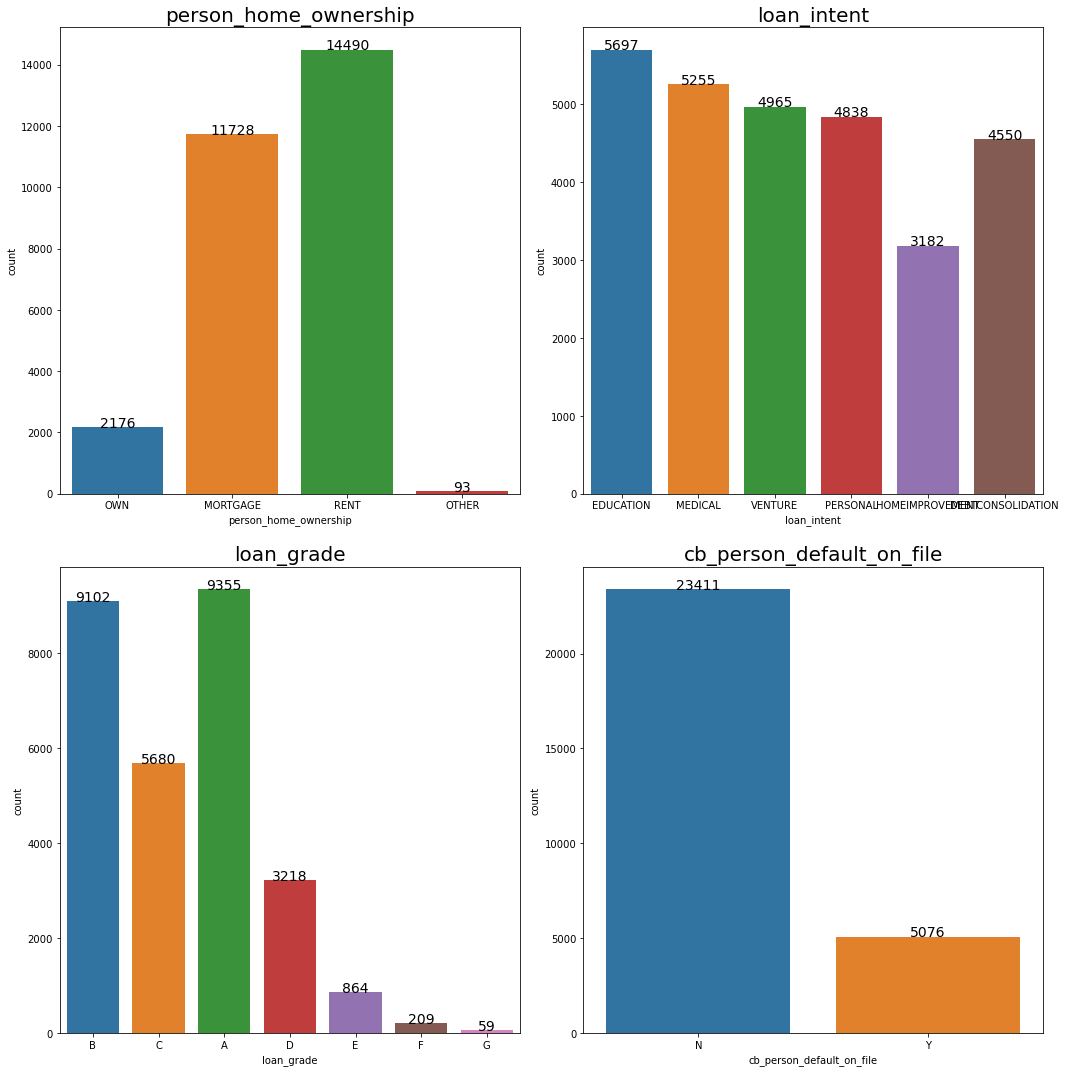

In [12]:
#Categorical
bar(df,cat)

In [13]:
#Normal Test
normal(df,num)

person_age : Not normal distribution
person_income : Not normal distribution
person_emp_length : Not normal distribution
loan_amnt : Not normal distribution
loan_int_rate : Not normal distribution
loan_status : Not normal distribution
loan_percent_income : Not normal distribution
cb_person_cred_hist_length : Not normal distribution


### Outliers

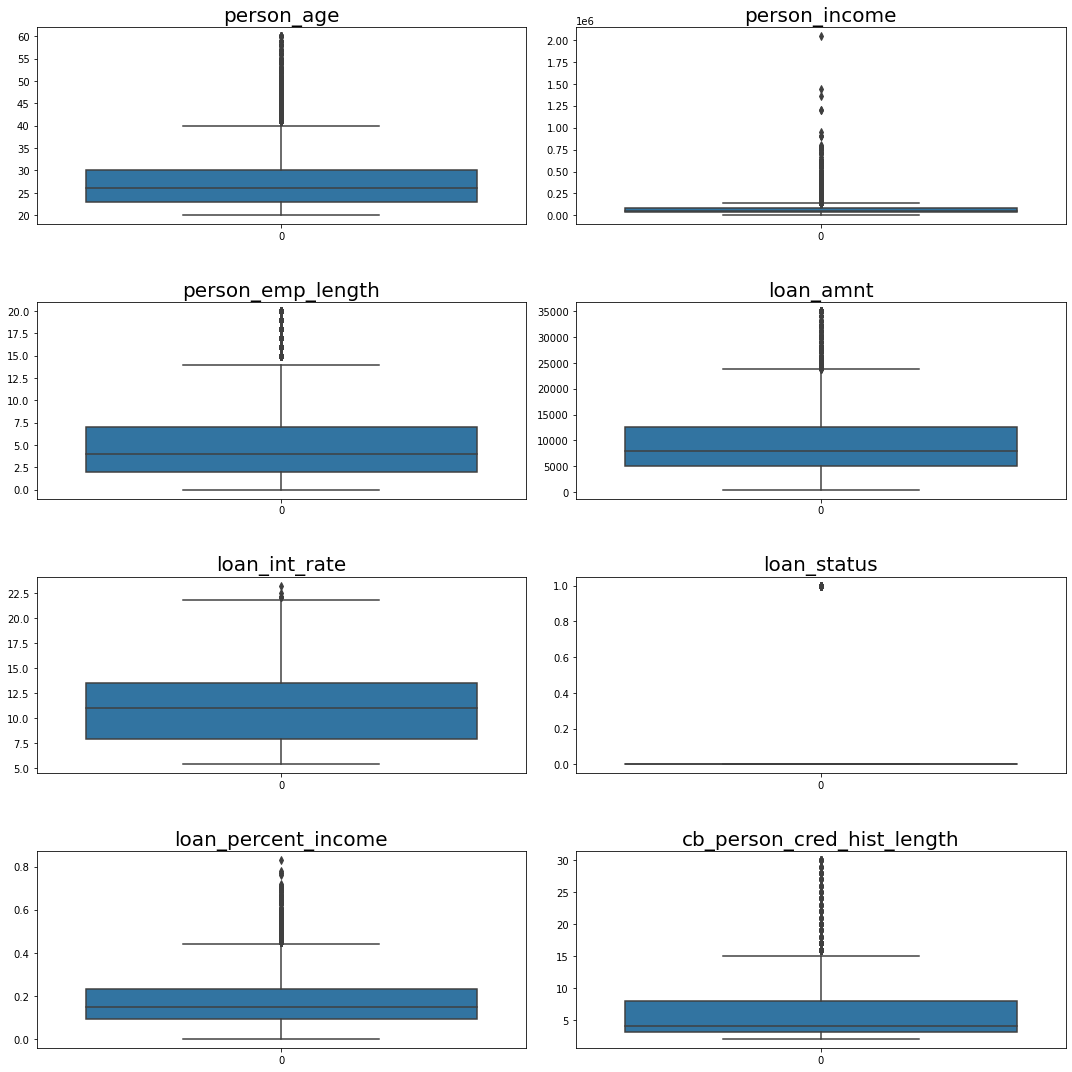

In [14]:
#Box Plot
box(df,num)

### Correlation

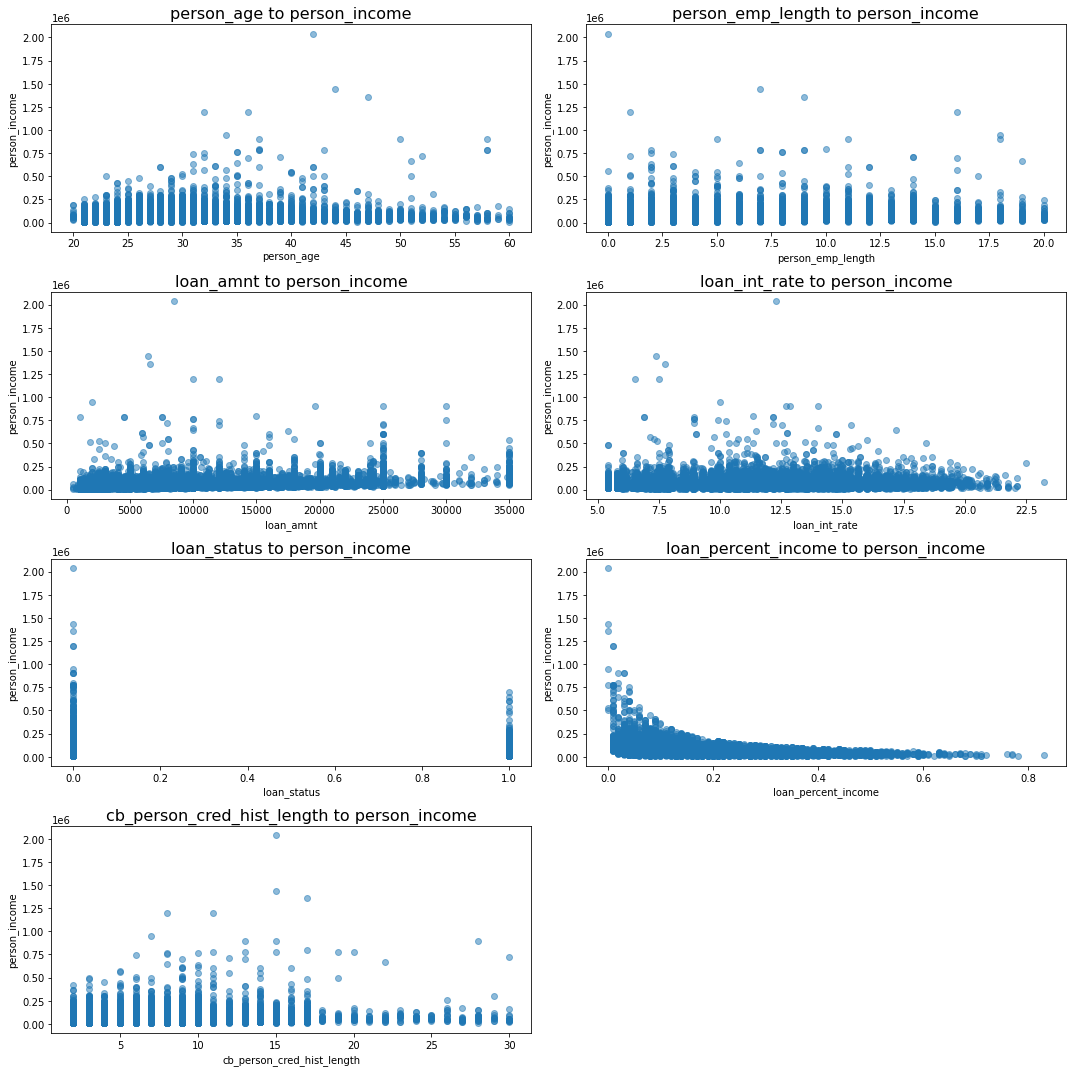

In [15]:
#Scatter Plot
scatter(df, num, 'person_income')

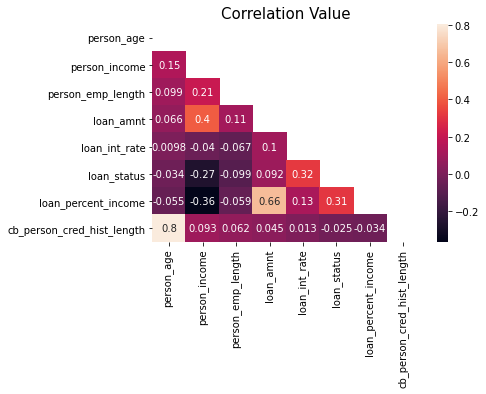

In [16]:
#Correlation
corr(df,num)

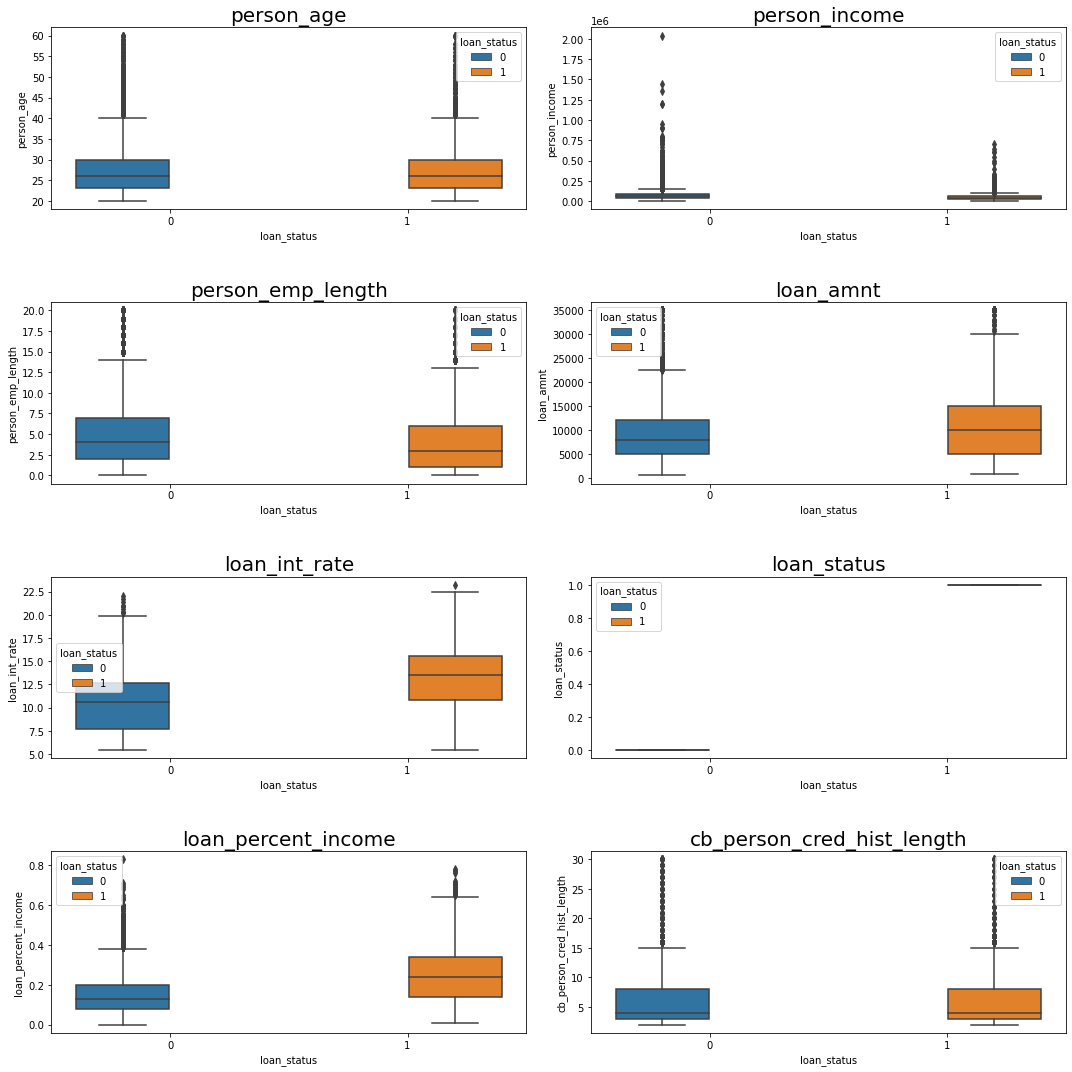

In [36]:
#Numerical
box(df,num,'loan_status')

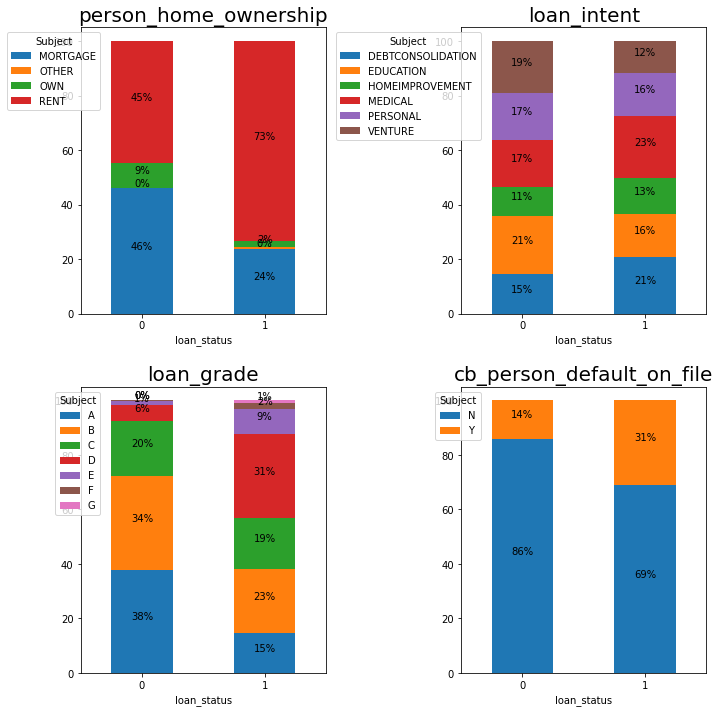

In [37]:
#Categorical
bar(df,cat,'loan_status')

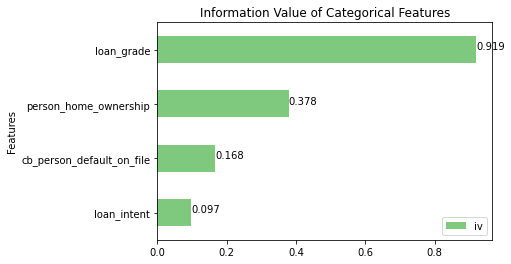

In [38]:
#IV
iv(df,cat,'loan_status',1,0)

### Label Proportion

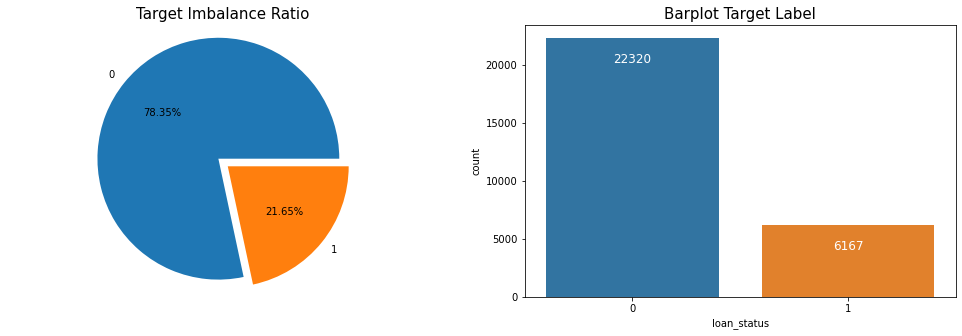

In [39]:
tar_pro(df, 'loan_status')

# Treatment 1
* Add feature.
* Transform distribution.

## Dataset

In [21]:
df_feat = df.copy()
df_feat.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


## Feature Engineering

### Distribution Transformation
* `loan amnt`
* `loan_int_rate`
* `loan_percent_income`

In [22]:
def log_transf (data, features):
    df_new = data.copy()
    for feature in features:
        yf, lam = yeojohnson(df[feature])
        df_new[feature] = yf
    return df_new

In [23]:
list_trans = ['loan_amnt','loan_int_rate','loan_percent_income']
df_feat = log_transf(df_feat,list_trans)

## Exploratory Dataset Analysis (EDA)

### Descriptive Statistic

In [24]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28487 entries, 1 to 28636
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28487 non-null  int64  
 1   person_income               28487 non-null  int64  
 2   person_home_ownership       28487 non-null  object 
 3   person_emp_length           28487 non-null  float64
 4   loan_intent                 28487 non-null  object 
 5   loan_grade                  28487 non-null  object 
 6   loan_amnt                   28487 non-null  float64
 7   loan_int_rate               28487 non-null  float64
 8   loan_status                 28487 non-null  int64  
 9   loan_percent_income         28487 non-null  float64
 10  cb_person_default_on_file   28487 non-null  object 
 11  cb_person_cred_hist_length  28487 non-null  int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 4.1+ MB


### Distribution

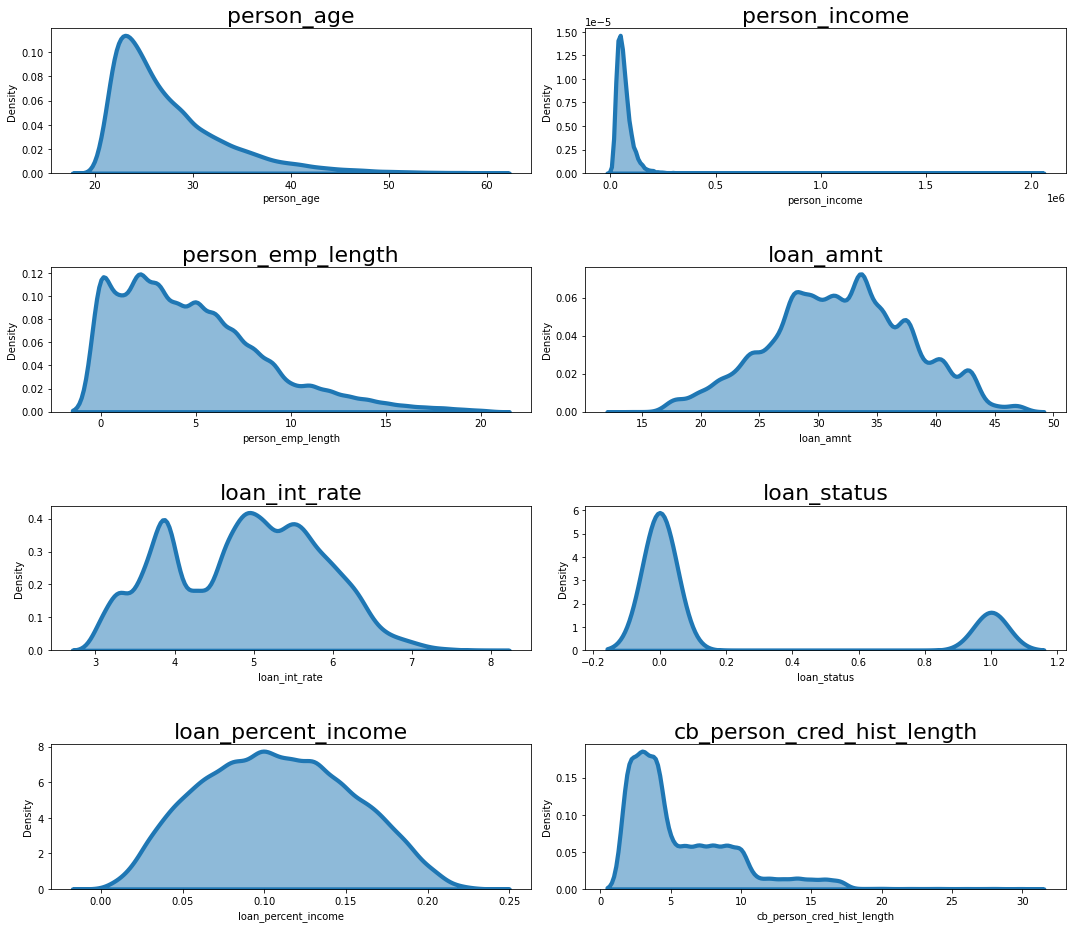

In [25]:
#Numerical
hist(df_feat,num)

### Outliers

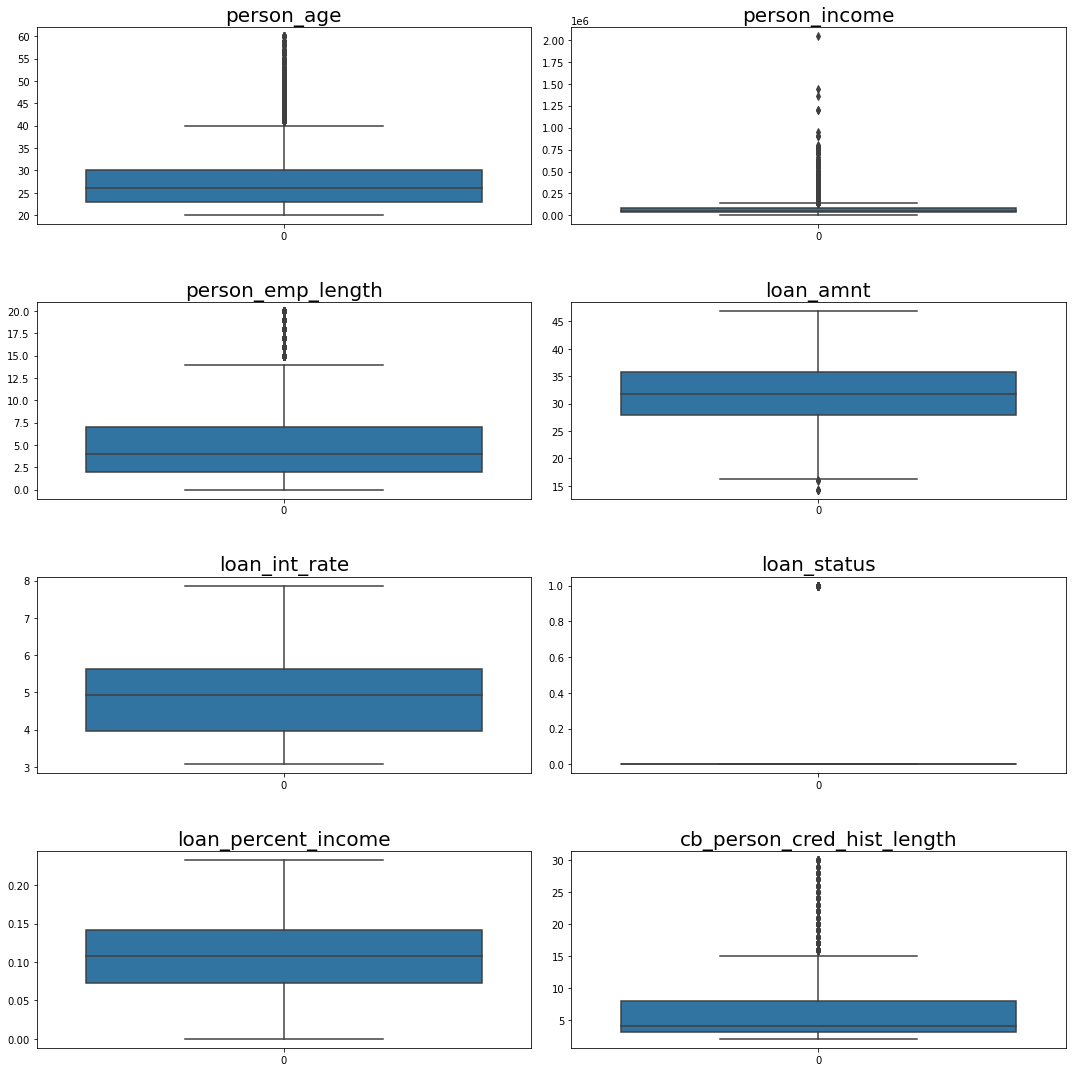

In [28]:
#Box Plot
box(df_feat,num)

### Correlation

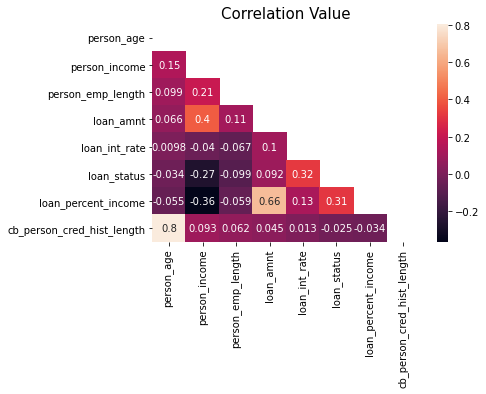

In [32]:
#Correlation
corr(df_feat,num)

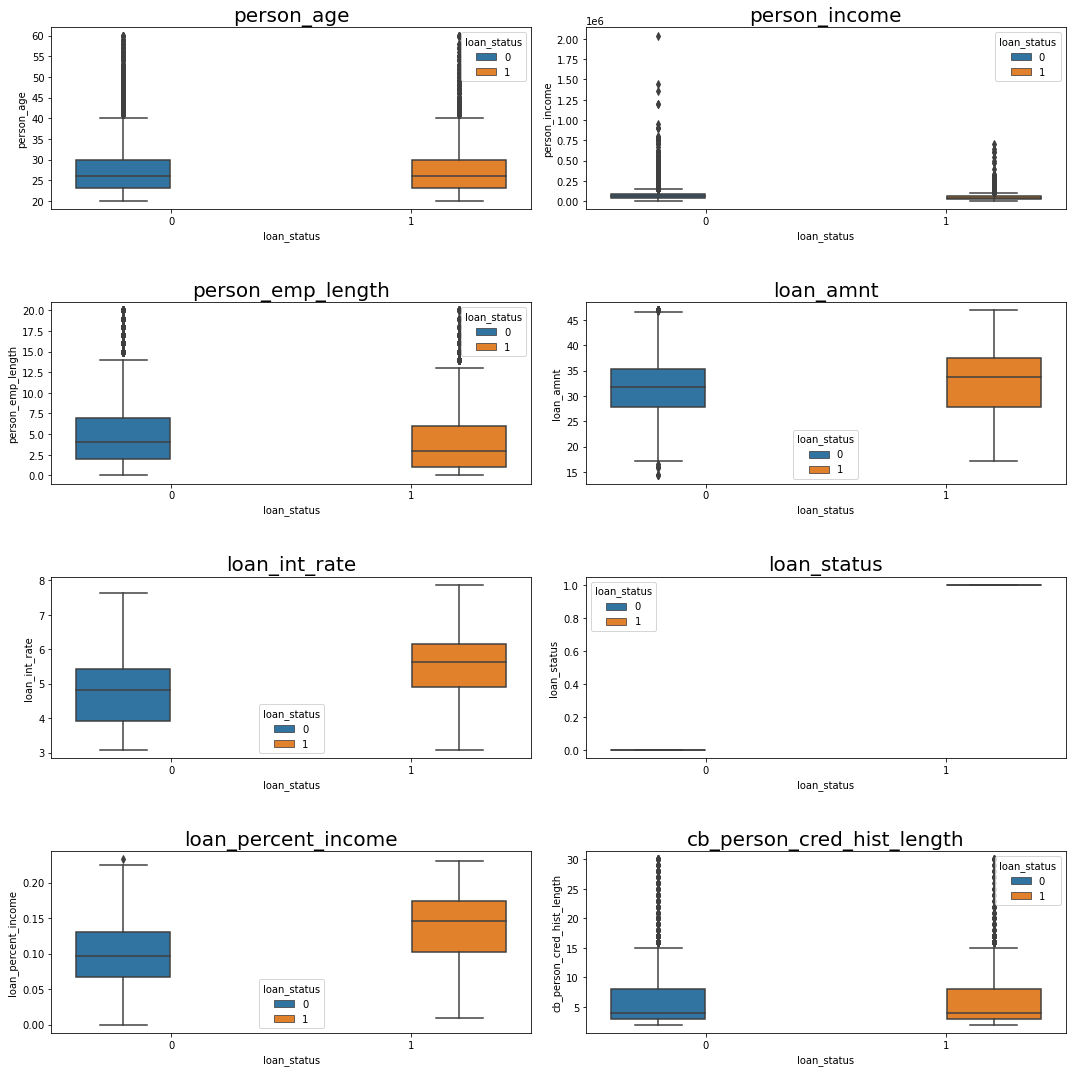

In [33]:
#Numerical
box(df_feat,num,'loan_status')

# Export Dataset

In [42]:
#Path
dataset_path = r'C:\Users\juan\Documents\Portfolio Project\credit_score\dataset'

#Baseline dataset
df.to_csv(os.path.join(dataset_path,r'baseline_data.csv'),index=False)

#transform distribution dataset
df_feat.to_csv(os.path.join(dataset_path,r'trans_date.csv'),index=False)